# Logistic Regression

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
dataset = pd.read_csv("shipping.csv")

In [36]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [66]:
# Droping the non - coorelational features

dataset2 = dataset.drop(columns=['Mode_of_Shipment', 'Warehouse_block', 'Product_importance', 'Gender'])

In [67]:
dataset2

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1
10995,10996,4,1,232,5,6,1247,0
10996,10997,5,4,242,5,4,1155,0
10997,10998,5,2,223,6,2,1210,0


In [68]:
# Spliting into Independent and dependent Features.
x = dataset2.loc[:, dataset2.columns != 'Reached.on.Time_Y.N']
y = dataset2['Reached.on.Time_Y.N']

In [69]:
# Spliting the features into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [70]:
x_train

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
9957,9958,7,4,282,4,6,1800
1507,1508,4,1,135,2,64,1471
6382,6383,4,1,214,2,10,4447
1559,1560,3,1,171,2,1,1629
5703,5704,5,5,248,2,4,5587
...,...,...,...,...,...,...,...
5734,5735,3,5,275,2,7,4619
5191,5192,5,5,187,4,9,5326
5390,5391,4,2,137,2,2,5804
860,861,5,3,144,6,35,1009


In [71]:
y_train

9957    0
1507    1
6382    0
1559    1
5703    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Reached.on.Time_Y.N, Length: 7699, dtype: int64

In [72]:
# Standardizing the dataset split

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
x_train = scaler.fit_transform(x_train)

In [75]:
x_test = scaler.transform(x_test)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
reg = LogisticRegression()

In [78]:
reg.fit(x_train, y_train)

LogisticRegression()

In [80]:
pred = reg.predict(x_test)

<AxesSubplot: xlabel='Reached.on.Time_Y.N', ylabel='Density'>

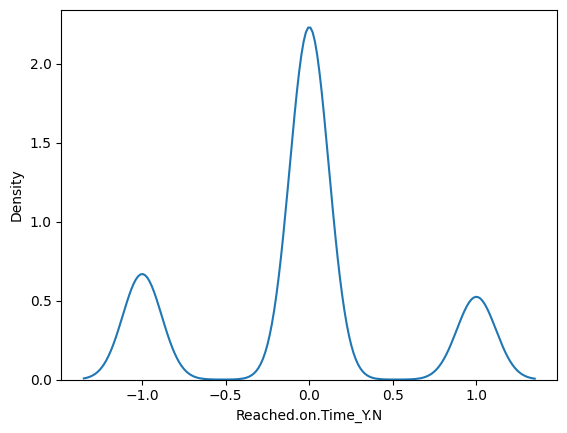

In [81]:
import seaborn as sns
sns.kdeplot(pred-y_test)

In [84]:
from sklearn import metrics

In [85]:
metrics.confusion_matrix(y_test, pred)

array([[ 807,  505],
       [ 644, 1344]], dtype=int64)

In [87]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[ 807  505]
 [ 644 1344]]


In [90]:
# Use score method to get accuracy of model
score = reg.score(x_test, y_test)
print(score)

0.6518181818181819


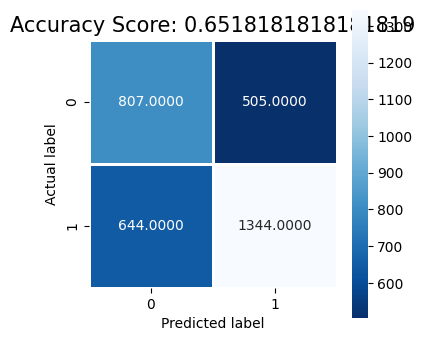

In [95]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".4f", linewidths=.8, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);